In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl
import seaborn as sns

In [3]:
diamonds = pd.read_csv('diamonds.csv')
diamonds.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75


In [4]:
valores_nulos_diamonds= diamonds.isnull().sum()
valores_nulos_diamonds

carat      3
cut        0
color      0
clarity    0
depth      2
table      3
price      3
x          1
y          1
z          4
dtype: int64

In [5]:
diamonds_copia = diamonds.copy()

In [9]:
diamonds_copia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53937 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53938 non-null  float64
 5   table    53937 non-null  float64
 6   price    53937 non-null  float64
 7   x        53939 non-null  float64
 8   y        53939 non-null  float64
 9   z        53936 non-null  float64
dtypes: float64(7), object(3)
memory usage: 4.1+ MB


In [15]:
diamonds_copia["carat"]= diamonds_copia["carat"].fillna(round(diamonds["carat"].mean(),1))
diamonds_copia["depth"]= diamonds_copia["depth"].fillna(round(diamonds["depth"].mean(),1))
diamonds_copia["table"]= diamonds_copia["table"].fillna(round(diamonds["table"].mean(),1))
diamonds_copia["price"]= diamonds_copia["price"].fillna(round(diamonds["price"].mean(),1))
diamonds_copia["x"]= diamonds_copia["x"].fillna(round(diamonds["x"].mean(),1))
diamonds_copia["y"]= diamonds_copia["y"].fillna(round(diamonds["y"].mean(),1))
diamonds_copia["z"]= diamonds_copia["z"].fillna(round(diamonds["z"].mean(),1))

In [16]:
valores_nulos_diamonds_copia = diamonds_copia.isnull().sum()
valores_nulos_diamonds_copia

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [17]:
columnas_cualitativas = diamonds_copia.select_dtypes(include = 'object')
columnas_cuantitativas = diamonds_copia.select_dtypes(include = ['float64'])

<Figure size 2000x1000 with 0 Axes>

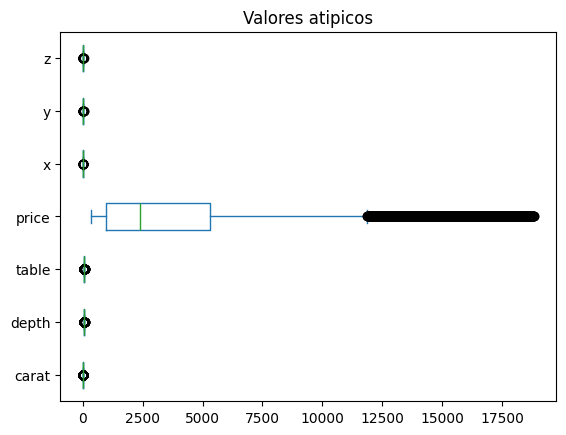

In [18]:
fig = plt.figure(figsize = (20, 10))
columnas_cuantitativas.plot(kind = 'box', vert = False)
plt.title("Valores atipicos")
plt.show()

In [19]:
y = columnas_cuantitativas
Limite_superior = y.mean() + 3*y.std()
Limite_inferior = y.mean() - 3*y.std()
print("Limite superior permitido", Limite_superior)
print("Limite inferior permitido", Limite_inferior)

Limite superior permitido carat        2.219953
depth       66.047217
table       64.160560
price    15901.154414
x            9.096441
y            9.160929
z            5.655794
dtype: float64
Limite inferior permitido carat      -0.624090
depth      57.451571
table      50.753974
price   -8035.391985
x           2.365894
y           2.308121
z           1.421668
dtype: float64


In [20]:
columnas_cuantitativas_sin_outliers = columnas_cuantitativas[(y <= Limite_superior) & (y >= Limite_inferior)]
valores_nulos_cuantitativo = columnas_cuantitativas_sin_outliers.isnull().sum()
valores_nulos_cuantitativo

carat     439
depth     685
table     336
price    1206
x          43
y          34
z          55
dtype: int64

In [21]:
columnas_cuantitativas_limpio = columnas_cuantitativas_sin_outliers.copy()
columnas_cuantitativas_limpio = columnas_cuantitativas_limpio.fillna(round(columnas_cuantitativas_sin_outliers.mean(), 1))

In [22]:
diamonds_sin_outliers = pd.concat([columnas_cuantitativas_limpio, columnas_cualitativas], axis = 1)
diamonds_sin_outliers.head()

,carat,depth,table,price,x,y,z,cut,color,clarity
0,0.23,61.5,55.0,326.0,3.95,3.98,2.43,Ideal,E,SI2
1,0.21,59.8,61.0,326.0,3.89,3.84,2.31,Premium,E,SI1
2,0.23,61.7,57.4,327.0,4.05,4.07,2.31,Good,E,VS1
3,0.29,62.4,58.0,334.0,4.20,4.23,2.63,Premium,I,VS2
4,0.31,63.3,58.0,335.0,4.34,4.35,2.75,Good,J,SI2


In [23]:
valores_nulos_diamonds_sin_outliers = diamonds_sin_outliers.isnull().sum()
valores_nulos_diamonds_sin_outliers

carat      0
depth      0
table      0
price      0
x          0
y          0
z          0
cut        0
color      0
clarity    0
dtype: int64

In [25]:
freq_tbl(diamonds_sin_outliers)
diamonds_sin_outliers.dtypes

         cut  frequency  percentage  cumulative_perc
0      Ideal      21551    0.399537         0.399537
1    Premium      13791    0.255673         0.655209
2  Very Good      12082    0.223990         0.879199
3       Good       4906    0.090953         0.970152
4       Fair       1610    0.029848         1.000000

----------------------------------------------------------------

  color  frequency  percentage  cumulative_perc
0     G      11292    0.209344         0.209344
1     E       9797    0.181628         0.390971
2     F       9542    0.176900         0.567872
3     H       8304    0.153949         0.721821
4     D       6775    0.125603         0.847423
5     I       5422    0.100519         0.947942
6     J       2808    0.052058         1.000000

----------------------------------------------------------------

  clarity  frequency  percentage  cumulative_perc
0     SI1      13065    0.242214         0.242214
1     VS2      12258    0.227253         0.469466
2     SI2     

carat      float64
depth      float64
table      float64
price      float64
x          float64
y          float64
z          float64
cut         object
color       object
clarity     object
dtype: object

In [26]:
Corr_Factors=columnas_cuantitativas_limpio.corr()
Corr_Factors1= abs(Corr_Factors)
Corr_Factors1

,carat,depth,table,price,x,y,z
carat,1.000000,0.011303,0.185252,0.850727,0.957223,0.955947,0.955040
depth,0.011303,1.000000,0.277038,0.002363,0.031844,0.033726,0.074941
table,0.185252,0.277038,1.000000,0.128089,0.195969,0.190798,0.159849
price,0.850727,0.002363,0.128089,1.000000,0.842960,0.844283,0.840151
x,0.957223,0.031844,0.195969,0.842960,1.000000,0.997742,0.989112
y,0.955947,0.033726,0.190798,0.844283,0.997742,1.000000,0.988657
z,0.955040,0.074941,0.159849,0.840151,0.989112,0.988657,1.000000


<Axes: >

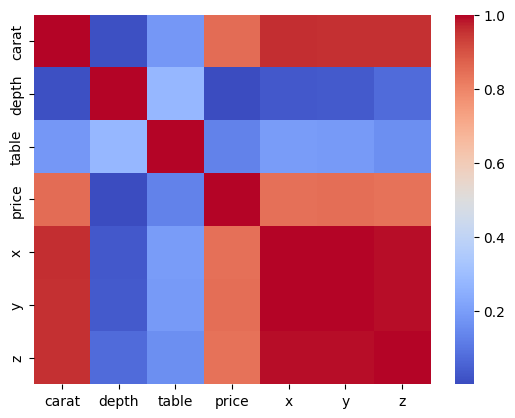

In [28]:
#Mapa de calor
Heat_map_diamonds= sns.heatmap(Corr_Factors1, cmap = 'coolwarm')
Heat_map_diamonds

CARAT Y PRICE

0.8507269349098782

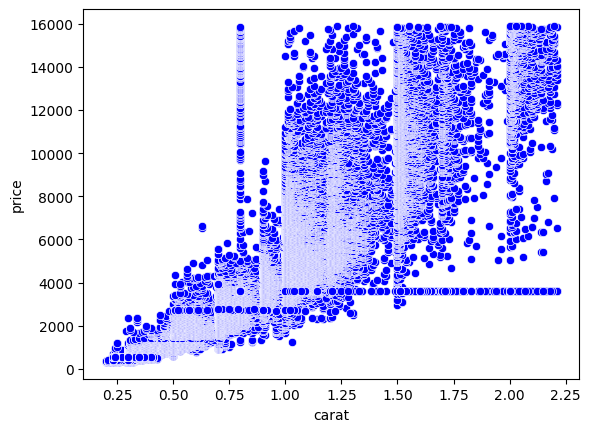

In [37]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= columnas_cuantitativas_limpio[['carat']]
Var_Dep= columnas_cuantitativas_limpio['price']

#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()
     
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
sns.scatterplot(x='carat', y='price', color="blue", data=columnas_cuantitativas_limpio)
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

DEPTH Y PRICE

0.0023629420848457483

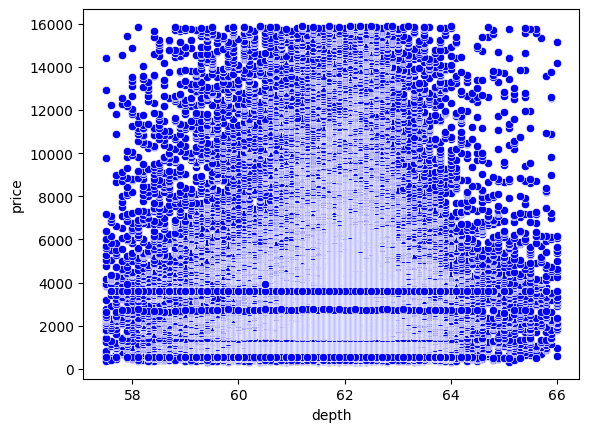

In [38]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= columnas_cuantitativas_limpio[['depth']]
Var_Dep= columnas_cuantitativas_limpio['price']

#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()
     
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
sns.scatterplot(x='depth', y='price', color="blue", data=columnas_cuantitativas_limpio)
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Correl2=np.sqrt(coef_Deter)
coef_Correl2

TABLE Y PRICE

0.1280894880280471

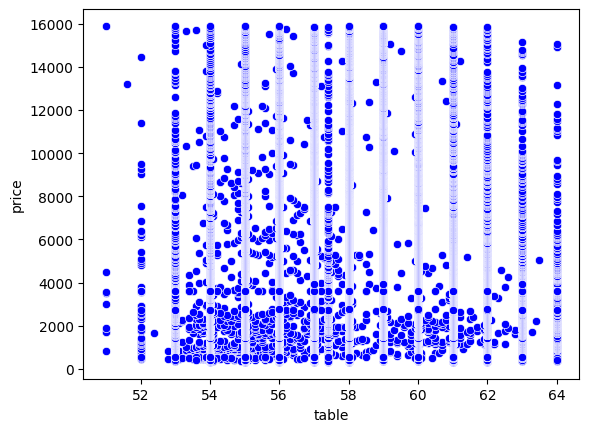

In [39]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= columnas_cuantitativas_limpio[['table']]
Var_Dep= columnas_cuantitativas_limpio['price']

#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()
     
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
sns.scatterplot(x='table', y='price', color="blue", data=columnas_cuantitativas_limpio)
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Correl3=np.sqrt(coef_Deter)
coef_Correl3

CARAT, DEPTH Y PRICE

<Axes: xlabel='price', ylabel='carat'>

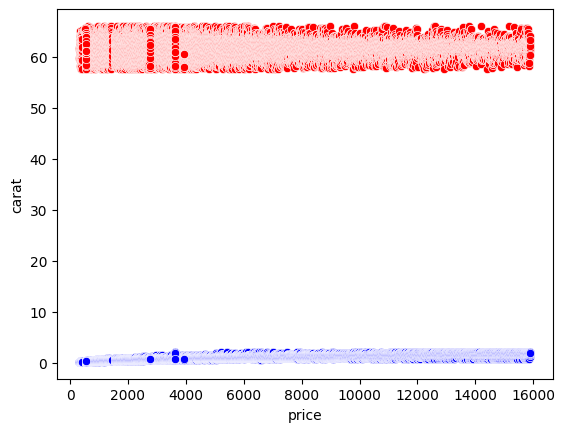

In [35]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_IndepM= columnas_cuantitativas_limpio[["carat","depth"]]
Var_DepM= columnas_cuantitativas_limpio['price']

#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
modelM= LinearRegression()
     

#Ajustamos el modelo con las variables antes declaradas
modelM.fit(X=Vars_IndepM, y=Var_DepM)

modelM.__dict__

coef_DeterM=modelM.score(X=Vars_IndepM, y=Var_DepM)
coef_CorrelM=np.sqrt(coef_DeterM)
coef_CorrelM

#Modelo predictivo
y_pred= modelM.predict(X=columnas_cuantitativas_limpio[["carat","depth"]])

sns.scatterplot(x='price', y='carat', color="blue", data=columnas_cuantitativas_limpio)
sns.scatterplot(x='price', y='depth', color="red", data=columnas_cuantitativas_limpio)

CARAT, TABLE Y PRICE

<Axes: xlabel='price', ylabel='carat'>

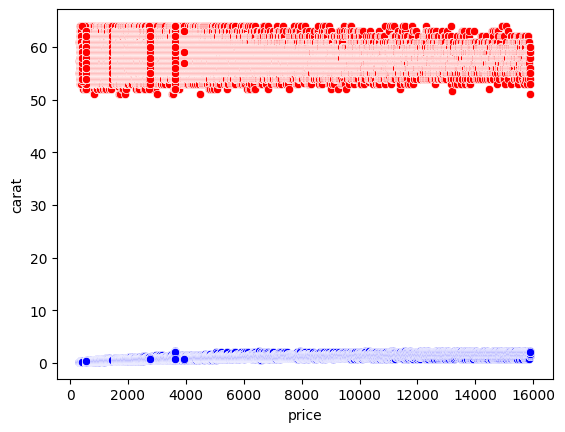

In [36]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_IndepM= columnas_cuantitativas_limpio[["carat","table"]]
Var_DepM= columnas_cuantitativas_limpio['price']

#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
modelM= LinearRegression()
     

#Ajustamos el modelo con las variables antes declaradas
modelM.fit(X=Vars_IndepM, y=Var_DepM)

modelM.__dict__

coef_DeterM=modelM.score(X=Vars_IndepM, y=Var_DepM)
coef_CorrelM=np.sqrt(coef_DeterM)
coef_CorrelM

#Modelo predictivo
y_pred= modelM.predict(X=columnas_cuantitativas_limpio[["carat","table"]])

sns.scatterplot(x='price', y='carat', color="blue", data=columnas_cuantitativas_limpio)
sns.scatterplot(x='price', y='table', color="red", data=columnas_cuantitativas_limpio)

DEPTH, TABLE Y PRICE

<Axes: xlabel='price', ylabel='depth'>

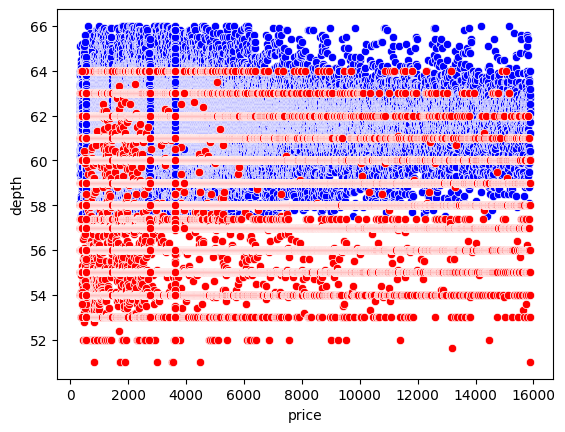

In [40]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_IndepM= columnas_cuantitativas_limpio[["depth","table"]]
Var_DepM= columnas_cuantitativas_limpio['price']

#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
modelM= LinearRegression()
     

#Ajustamos el modelo con las variables antes declaradas
modelM.fit(X=Vars_IndepM, y=Var_DepM)

modelM.__dict__

coef_DeterM=modelM.score(X=Vars_IndepM, y=Var_DepM)
coef_CorrelM=np.sqrt(coef_DeterM)
coef_CorrelM

#Modelo predictivo
y_pred= modelM.predict(X=columnas_cuantitativas_limpio[["depth","table"]])

sns.scatterplot(x='price', y='depth', color="blue", data=columnas_cuantitativas_limpio)
sns.scatterplot(x='price', y='table', color="red", data=columnas_cuantitativas_limpio)

tamaño(x, y, z) y PRICE

<Axes: xlabel='price', ylabel='x'>

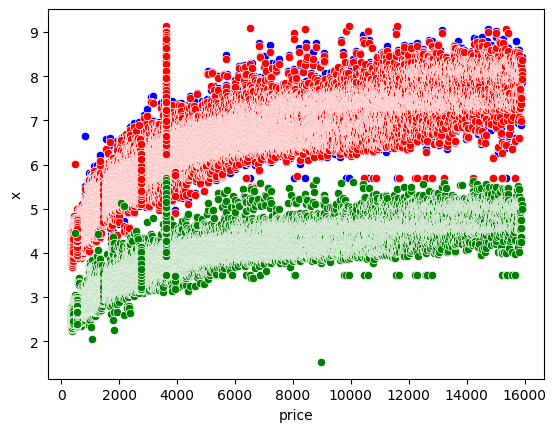

In [42]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_IndepM= columnas_cuantitativas_limpio[["x","y", "z"]]
Var_DepM= columnas_cuantitativas_limpio['price']

#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
modelM= LinearRegression()
     

#Ajustamos el modelo con las variables antes declaradas
modelM.fit(X=Vars_IndepM, y=Var_DepM)

modelM.__dict__

coef_DeterM=modelM.score(X=Vars_IndepM, y=Var_DepM)
coef_CorrelM=np.sqrt(coef_DeterM)
coef_CorrelM

#Modelo predictivo
y_pred= modelM.predict(X=columnas_cuantitativas_limpio[["x","y", "z"]])

sns.scatterplot(x='price', y='x', color="blue", data=columnas_cuantitativas_limpio)
sns.scatterplot(x='price', y='y', color="red", data=columnas_cuantitativas_limpio)
sns.scatterplot(x='price', y='z', color="green", data=columnas_cuantitativas_limpio)

TAMAÑO, CARAT, DEPTH Y PRICE

<Axes: xlabel='price', ylabel='x'>

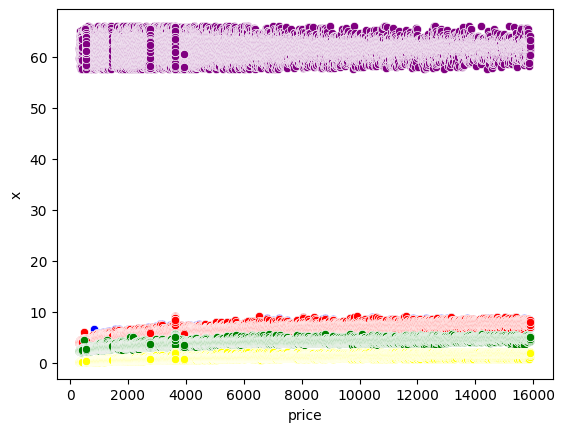

In [43]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_IndepM= columnas_cuantitativas_limpio[["x","y", "z", "carat", "depth"]]
Var_DepM= columnas_cuantitativas_limpio['price']

#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
modelM= LinearRegression()
     

#Ajustamos el modelo con las variables antes declaradas
modelM.fit(X=Vars_IndepM, y=Var_DepM)

modelM.__dict__

coef_DeterM=modelM.score(X=Vars_IndepM, y=Var_DepM)
coef_CorrelM=np.sqrt(coef_DeterM)
coef_CorrelM

#Modelo predictivo
y_pred= modelM.predict(X=columnas_cuantitativas_limpio[["x","y", "z", "carat", "depth"]])

sns.scatterplot(x='price', y='x', color="blue", data=columnas_cuantitativas_limpio)
sns.scatterplot(x='price', y='y', color="red", data=columnas_cuantitativas_limpio)
sns.scatterplot(x='price', y='z', color="green", data=columnas_cuantitativas_limpio)
sns.scatterplot(x='price', y='carat', color="yellow", data=columnas_cuantitativas_limpio)
sns.scatterplot(x='price', y='depth', color="purple", data=columnas_cuantitativas_limpio)

TAMAÑO, CARAT, DEPTH, TABLE Y PRICE

<Axes: xlabel='price', ylabel='x'>

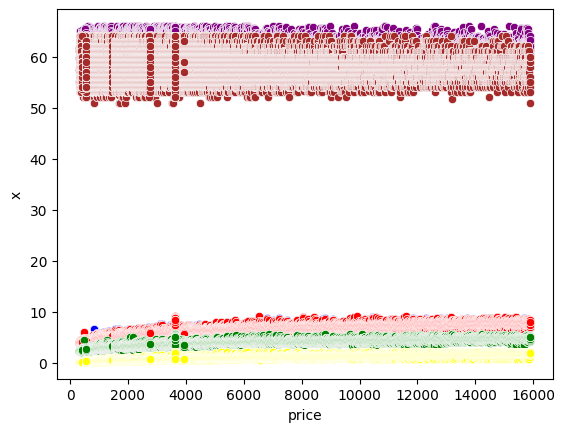

In [44]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_IndepM= columnas_cuantitativas_limpio[["x","y", "z", "carat", "depth", "table"]]
Var_DepM= columnas_cuantitativas_limpio['price']

#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
modelM= LinearRegression()
     

#Ajustamos el modelo con las variables antes declaradas
modelM.fit(X=Vars_IndepM, y=Var_DepM)

modelM.__dict__

coef_DeterM=modelM.score(X=Vars_IndepM, y=Var_DepM)
coef_CorrelM=np.sqrt(coef_DeterM)
coef_CorrelM

#Modelo predictivo
y_pred= modelM.predict(X=columnas_cuantitativas_limpio[["x","y", "z", "carat", "depth", "table"]])

sns.scatterplot(x='price', y='x', color="blue", data=columnas_cuantitativas_limpio)
sns.scatterplot(x='price', y='y', color="red", data=columnas_cuantitativas_limpio)
sns.scatterplot(x='price', y='z', color="green", data=columnas_cuantitativas_limpio)
sns.scatterplot(x='price', y='carat', color="yellow", data=columnas_cuantitativas_limpio)
sns.scatterplot(x='price', y='depth', color="purple", data=columnas_cuantitativas_limpio)
sns.scatterplot(x='price', y='table', color="brown", data=columnas_cuantitativas_limpio)